In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from econml.grf import CausalForest
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve

from matplotlib import pyplot as plt

# Train models

In [4]:
data = pd.read_csv("bsc_project_set.csv", index_col=0)

xs = data.copy()

y = xs["mort_28"]
w = xs["peep_regime"]

w = pd.Series(map(lambda x: 0 if x == "low" else 1, w))
y = pd.Series(map(lambda x: 1 if x == False else 0, y))

# xs = xs.drop(columns=["id", "mort_28", "peep", "peep_regime"])
selected_columns = ["age", "weight", "pf_ratio", "po2", "pco2", "driving_pressure", "fio2", "minute_volume", "plateau_pressure"]
xs = xs[selected_columns]
columns_x = xs.columns

norm_xs = (xs - xs.mean())/xs.std()

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imp_xs = imputer.fit_transform(norm_xs)

imp_xs = pd.DataFrame(data=imp_xs, columns=columns_x)

imp_xs

,age,weight,pf_ratio,po2,pco2,driving_pressure,fio2,minute_volume,plateau_pressure
0,0.732971,0.183841,-0.026374,-0.049713,-1.422636,-0.364306,-0.564826,-0.543738,0.705302
1,-1.005004,1.422974,-0.637005,-0.385550,-0.768253,-1.141620,0.758913,3.032717,-0.620678
2,1.353676,-0.381057,-0.171336,-0.406111,-0.403630,1.468983,-0.434729,-0.035368,0.317210
3,1.353676,0.100018,-0.319055,-1.169822,-0.403630,1.395651,-1.503965,-0.868889,0.640620
4,0.050195,-0.654395,-0.577049,-0.737052,-0.334933,-1.072479,-0.385943,-1.051634,-1.236080
...,...,...,...,...,...,...,...,...,...
3936,0.919183,-1.128181,-0.711144,0.068026,-0.395043,1.219655,0.541000,-0.428608,0.252528
3937,0.732971,0.475402,-0.527518,-0.793421,-0.300585,-0.540301,-0.411497,-0.966353,-1.028174
3938,0.236407,0.438957,-0.701828,-0.554080,0.137359,0.281012,1.377339,-0.299739,1.869576
3939,0.298477,0.245798,-0.425805,-0.814696,-0.156321,0.075683,0.150708,-0.298318,0.113924


In [2]:
data = pd.read_csv("bsc_project_set.csv", index_col=0)

xs = data.copy()

# xs = xs.drop(columns=["id", "mort_28", "peep", "peep_regime"])
selected_columns = ["age", "weight", "pf_ratio", "po2", "pco2", "driving_pressure", "fio2", "minute_volume", "plateau_pressure"]
xs = xs[selected_columns]
columns_x = xs.columns

scaler = StandardScaler()
norm_xs = scaler.fit_transform(X=xs)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imp_xs = imputer.fit_transform(norm_xs)

imp_xs = pd.DataFrame(data=imp_xs, columns=columns_x)

imp_xs

,age,weight,pf_ratio,po2,pco2,driving_pressure,fio2,minute_volume,plateau_pressure
0,0.733064,0.183865,-0.026378,-0.049720,-1.422823,-0.364361,-0.564899,-0.543810,0.705400
1,-1.005132,1.423155,-0.637093,-0.385601,-0.768354,-1.141794,0.759011,3.033123,-0.620764
2,1.353848,-0.381106,-0.171360,-0.406165,-0.403683,1.469207,-0.434785,-0.035373,0.317254
3,1.353848,0.100031,-0.319099,-1.169976,-0.403683,1.395864,-1.504160,-0.869005,0.640709
4,0.050201,-0.654478,-0.577129,-0.737150,-0.334977,-1.072642,-0.385993,-1.051774,-1.236251
...,...,...,...,...,...,...,...,...,...
3936,0.919299,-1.128325,-0.711242,0.068035,-0.395095,1.219841,0.541070,-0.428666,0.252563
3937,0.733064,0.475462,-0.527592,-0.793526,-0.300624,-0.540384,-0.411551,-0.966482,-1.028316
3938,0.236437,0.439013,-0.701926,-0.554153,0.137377,0.281055,1.377518,-0.299779,1.869836
3939,0.298515,0.245829,-0.425864,-0.814804,-0.156342,0.075695,0.150728,-0.298358,0.113940


In [3]:
with open("improved_pickled_models/knn_imputer.pkl", "wb") as f:
    pickle.dump(imputer, f, protocol=5)

with open("improved_pickled_models/standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f, protocol=5)

In [4]:
with open("improved_pickled_models/knn_imputer.pkl", "rb") as f:
    read_knn_imputer = pickle.load(f)

with open("improved_pickled_models/standard_scaler.pkl", "rb") as f:
    read_standard_scaler = pickle.load(f)

In [5]:
# data = pd.read_csv("bsc_project_set.csv", index_col=0)
#
# xs = data.copy()
#
# # xs = xs.drop(columns=["id", "mort_28", "peep", "peep_regime"])
# selected_columns = ["age", "weight", "pf_ratio", "po2", "pco2", "driving_pressure", "fio2", "minute_volume", "plateau_pressure"]
# xs = xs[selected_columns]
# columns_x = xs.columns
#
# norm_xs = read_standard_scaler.transform(X=xs)
#
# imp_xs = read_knn_imputer.transform(X=norm_xs)
#
# imp_xs = pd.DataFrame(data=imp_xs, columns=columns_x)
#
# imp_xs

,age,weight,pf_ratio,po2,pco2,driving_pressure,fio2,minute_volume,plateau_pressure
0,0.733064,0.183865,-0.026378,-0.049720,-1.422823,-0.364361,-0.564899,-0.543810,0.705400
1,-1.005132,1.423155,-0.637093,-0.385601,-0.768354,-1.141794,0.759011,3.033123,-0.620764
2,1.353848,-0.381106,-0.171360,-0.406165,-0.403683,1.469207,-0.434785,-0.035373,0.317254
3,1.353848,0.100031,-0.319099,-1.169976,-0.403683,1.395864,-1.504160,-0.869005,0.640709
4,0.050201,-0.654478,-0.577129,-0.737150,-0.334977,-1.072642,-0.385993,-1.051774,-1.236251
...,...,...,...,...,...,...,...,...,...
3936,0.919299,-1.128325,-0.711242,0.068035,-0.395095,1.219841,0.541070,-0.428666,0.252563
3937,0.733064,0.475462,-0.527592,-0.793526,-0.300624,-0.540384,-0.411551,-0.966482,-1.028316
3938,0.236437,0.439013,-0.701926,-0.554153,0.137377,0.281055,1.377518,-0.299779,1.869836
3939,0.298515,0.245829,-0.425864,-0.814804,-0.156342,0.075695,0.150728,-0.298358,0.113940


In [58]:
full_data = imp_xs.assign(W=w, Y=y)

In [59]:
# # S-learner
# regr_s = RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=500, max_samples=0.5)
# regr_s.fit(full_data.drop(columns=["Y"]), full_data["Y"])
#
# # T-learner
# regr0_t = RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=500, max_samples=0.5)
# regr1_t = RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=500, max_samples=0.5)
# regr0_t.fit(full_data.query("W==0").drop(columns=["W", "Y"]), full_data.query("W==0")["Y"])
# regr1_t.fit(full_data.query("W==1").drop(columns=["W", "Y"]), full_data.query("W==1")["Y"])
#
# # Causal forest
# causal_forest = CausalForest(max_depth=5, min_samples_split=10, n_estimators=2500)
# causal_forest.fit(X=full_data.drop(columns=["W", "Y"]), T=full_data["W"], y=full_data["Y"])

CausalForest(max_depth=5, n_estimators=2500)

In [60]:
# with open("pickled_models/causal_forest_model.pkl", "wb") as f:
#     pickle.dump(causal_forest, f, protocol=5)
#
# with open("pickled_models/s_learner_model.pkl", "wb") as f:
#     pickle.dump(regr_s, f, protocol=5)
#
# with open("pickled_models/t_learner_model_0.pkl", "wb") as f:
#     pickle.dump(regr0_t, f, protocol=5)
#
# with open("pickled_models/t_learner_model_1.pkl", "wb") as f:
#     pickle.dump(regr1_t, f, protocol=5)

In [5]:
# with open("pickled_models/causal_forest_model.pkl", "rb") as f:
#     causal_forest = pickle.load(f)
#
# with open("pickled_models/s_learner_model.pkl", "rb") as f:
#     regr_s = pickle.load(f)
#
# with open("pickled_models/t_learner_model_0.pkl", "rb") as f:
#     regr0_t = pickle.load(f)
#
# with open("pickled_models/t_learner_model_1.pkl", "rb") as f:
#     regr1_t = pickle.load(f)

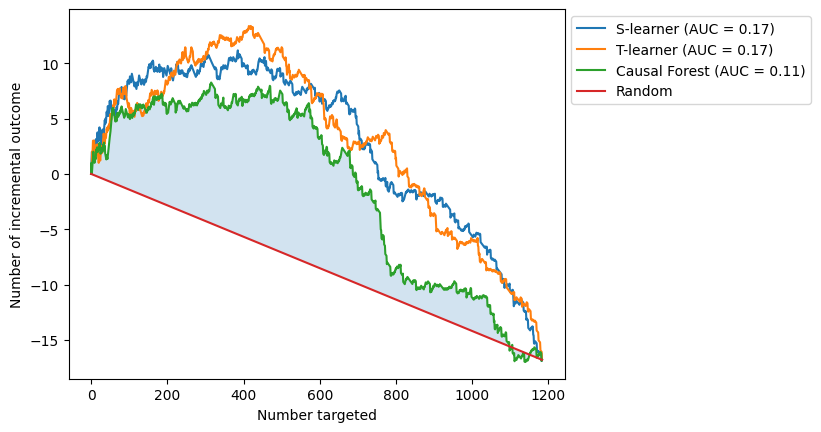

In [7]:
# fig, ax = plt.subplots(1, 1)
# plot_qini_curve(y_true=test["Y"].to_list(), uplift=regr_s.predict(test_x.assign(**{"W": 1})) - regr_s.predict(test_x.assign(**{"W": 0})), treatment=test["W"].to_list(), perfect=False, random=False, name="S-learner", ax=ax)
#
# plot_qini_curve(y_true=test["Y"].to_list(), uplift=(regr1_t.predict(test_x) - regr0_t.predict(test_x)).tolist(), treatment=test["W"].to_list(), perfect=False, random=False, name="T-learner", ax=ax)
#
# plot_qini_curve(y_true=test["Y"].to_list(), uplift=np.concatenate(causal_forest.predict(X=test_x)).tolist(), treatment=test["W"].to_list(), perfect=False, name="Causal Forest", ax=ax)

In [27]:
def find_best_s_learner(data, reps):
    best_area = 0
    best_model = None
    for i in range(reps):
        train, test = train_test_split(data, test_size=0.3)
        train_x = train[columns_x]
        test_x = test[columns_x]

        regr_s = RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=500, max_samples=0.5)
        regr_s.fit(train.drop(columns=["Y"]), train["Y"])

        cur_area = qini_auc_score(y_true=test["Y"].to_list(), uplift=regr_s.predict(test_x.assign(**{"W": 1})) - regr_s.predict(test_x.assign(**{"W": 0})), treatment=test["W"].to_list())

        if cur_area > best_area:
            best_model = regr_s
            best_area = cur_area

    return best_model, best_area

In [28]:
def find_best_t_learner(data, reps):
    best_area = 0
    best_model_0 = None
    best_model_1 = None
    for i in range(reps):
        train, test = train_test_split(data, test_size=0.3)
        train_x = train[columns_x]
        test_x = test[columns_x]

        regr0_t = RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=500, max_samples=0.5)
        regr1_t = RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=500, max_samples=0.5)
        regr0_t.fit(train.query("W==0").drop(columns=["W", "Y"]), train.query("W==0")["Y"])
        regr1_t.fit(train.query("W==1").drop(columns=["W", "Y"]), train.query("W==1")["Y"])

        cur_area = qini_auc_score(y_true=test["Y"].to_list(), uplift=(regr1_t.predict(test_x) - regr0_t.predict(test_x)).tolist(), treatment=test["W"].to_list())

        if cur_area > best_area:
            best_model_0 = regr0_t
            best_model_1 = regr1_t
            best_area = cur_area

    return best_model_0, best_model_1, best_area

In [29]:
def find_best_causal_forest(data, reps):
    best_area = 0
    best_model = None
    for i in range(reps):
        train, test = train_test_split(data, test_size=0.3)
        train_x = train[columns_x]
        test_x = test[columns_x]

        forest = CausalForest(max_depth=5, min_samples_split=10, n_estimators=2500)
        forest.fit(X=train_x, T=train["W"], y=train["Y"])

        cur_area = qini_auc_score(y_true=test["Y"].to_list(), uplift=np.concatenate(forest.predict(X=test_x)).tolist(), treatment=test["W"].to_list())

        if cur_area > best_area:
            best_model = forest
            best_area = cur_area

    return best_model, best_area

In [34]:
best_s_learner, best_s_learner_area = find_best_s_learner(full_data, 500)
print(best_s_learner_area)

0.11265523709794854


In [35]:
best_t_learner_0, best_t_learner_1, best_t_learner_area = find_best_t_learner(full_data, 500)
print(best_t_learner_area)

0.1151746443677528


In [36]:
best_causal_forest, best_causal_forest_area = find_best_causal_forest(full_data, 500)
print(best_causal_forest_area)

0.07339669352734574


In [38]:
with open("improved_pickled_models/causal_forest_model.pkl", "wb") as f:
    pickle.dump(best_causal_forest, f, protocol=5)

with open("improved_pickled_models/s_learner_model.pkl", "wb") as f:
    pickle.dump(best_s_learner, f, protocol=5)

with open("improved_pickled_models/t_learner_model_0.pkl", "wb") as f:
    pickle.dump(best_t_learner_0, f, protocol=5)

with open("improved_pickled_models/t_learner_model_1.pkl", "wb") as f:
    pickle.dump(best_t_learner_1, f, protocol=5)

In [39]:
with open("improved_pickled_models/causal_forest_model.pkl", "rb") as f:
    causal_forest = pickle.load(f)

with open("improved_pickled_models/s_learner_model.pkl", "rb") as f:
    regr_s = pickle.load(f)

with open("improved_pickled_models/t_learner_model_0.pkl", "rb") as f:
    regr0_t = pickle.load(f)

with open("improved_pickled_models/t_learner_model_1.pkl", "rb") as f:
    regr1_t = pickle.load(f)

In [40]:
causal_forest.predict(X=full_data.drop(columns=["W", "Y"]))

array([[-0.14432067],
       [-0.14530357],
       [-0.13602155],
       ...,
       [-0.11234906],
       [-0.09162366],
       [-0.11039361]])

In [63]:
regr_s.predict(full_data.drop(columns=["W", "Y"]).assign(**{"W": 1})) - regr_s.predict(full_data.drop(columns=["W", "Y"]).assign(**{"W": 0}))

array([-0.07236983, -0.07370414, -0.08657526, ..., -0.03767396,
       -0.04392505, -0.07302504])

In [64]:
regr1_t.predict(full_data.drop(columns=["W", "Y"])) - regr0_t.predict(full_data.drop(columns=["W", "Y"]))

array([-0.20844512, -0.23685587, -0.29349542, ..., -0.15917994,
       -0.15326956, -0.30980973])

In [65]:
def predict_ite_causal_forest(forest_model, data):
    """
    Predicts ITEs using causal forest
    :param forest_model: the causal forest model, created using pickle.load()
    :param data: pandas dataframe with RCT data, created by for example pandas.read_csv("filename", index_col=0)
    :return: Predicted ITEs
    """

    xs = data.drop(columns=["peep_regime", "mort_28", "id"])
    xs.loc[xs["sex"] == "M", "sex"] = 0
    xs.loc[xs["sex"] == "F", "sex"] = 1
    xs_columns = xs.columns

    norm_xs = (xs - xs.mean())/xs.std()

    imputer = KNNImputer()
    imp_xs = imputer.fit_transform(norm_xs)
    imp_xs = pd.DataFrame(data=imp_xs, columns=xs_columns)

    selected_columns = ["age", "weight", "pf_ratio", "po2", "pco2", "driving_pressure", "fio2", "minute_volume", "plateau_pressure"]
    imp_xs = imp_xs[selected_columns]

    return forest_model.predict(X=imp_xs)

In [68]:
def predict_ite_s_learner(s_learner_model, data):
    """
    Predicts ITEs using S-learner
    :param s_learner_model: the S-learner model, created using pickle.load()
    :param data: pandas dataframe with RCT data, created by for example pandas.read_csv("filename", index_col=0)
    :return: Predicted ITEs
    """

    xs = data.drop(columns=["peep_regime", "mort_28", "id"])
    xs.loc[xs["sex"] == "M", "sex"] = 0
    xs.loc[xs["sex"] == "F", "sex"] = 1
    xs_columns = xs.columns

    norm_xs = (xs - xs.mean())/xs.std()

    imputer = KNNImputer()
    imp_xs = imputer.fit_transform(norm_xs)
    imp_xs = pd.DataFrame(data=imp_xs, columns=xs_columns)

    selected_columns = ["age", "weight", "pf_ratio", "po2", "pco2", "driving_pressure", "fio2", "minute_volume", "plateau_pressure"]
    imp_xs = imp_xs[selected_columns]

    return s_learner_model.predict(imp_xs.assign(**{"W": 1})) - s_learner_model.predict(imp_xs.assign(**{"W": 0}))

In [71]:
def predict_ite_t_learner(t_learner_model_0, t_learner_model_1, data):
    """
    Predicts ITEs using S-learner
    :param t_learner_model_0: the T-learner base model for Y_0, created using pickle.load()
    :param t_learner_model_1: the T-learner base model for Y_1, created using pickle.load()
    :param data: pandas dataframe with RCT data, created by for example pandas.read_csv("filename", index_col=0)
    :return: Predicted ITEs
    """

    xs = data.drop(columns=["peep_regime", "mort_28", "id"])
    xs.loc[xs["sex"] == "M", "sex"] = 0
    xs.loc[xs["sex"] == "F", "sex"] = 1
    xs_columns = xs.columns

    norm_xs = (xs - xs.mean())/xs.std()

    imputer = KNNImputer()
    imp_xs = imputer.fit_transform(norm_xs)
    imp_xs = pd.DataFrame(data=imp_xs, columns=xs_columns)

    selected_columns = ["age", "weight", "pf_ratio", "po2", "pco2", "driving_pressure", "fio2", "minute_volume", "plateau_pressure"]
    imp_xs = imp_xs[selected_columns]

    return t_learner_model_1.predict(imp_xs) - t_learner_model_0.predict(imp_xs)

# Evaluate

In [2]:
rct_data = pd.read_csv("rct_predictions.csv", index_col=0)
rct_data

,mort_28,peep_regime,s_learner_ite,t_learner_ite,causal_forest_ite
0,0.0,1.0,-0.032377,-0.132028,-0.082567
1,0.0,0.0,-0.031160,-0.238510,-0.126796
2,0.0,0.0,-0.011900,-0.115694,-0.057679
3,0.0,0.0,-0.039956,-0.267639,-0.121259
4,0.0,1.0,-0.020258,-0.176787,-0.103644
...,...,...,...,...,...
2294,0.0,1.0,-0.044273,-0.246337,-0.152315
2295,0.0,1.0,-0.014671,-0.077701,-0.080819
2296,1.0,0.0,-0.036225,-0.261443,-0.100296
2297,0.0,1.0,-0.023214,-0.131455,-0.070813


In [3]:
rct_data.describe()

,mort_28,peep_regime,s_learner_ite,t_learner_ite,causal_forest_ite
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,0.282297,0.494128,-0.031940,-0.182564,-0.112248
std,0.450215,0.500074,0.011809,0.073184,0.034080
min,0.000000,0.000000,-0.065995,-0.394339,-0.206514
25%,0.000000,0.000000,-0.040468,-0.236360,-0.136610
50%,0.000000,0.000000,-0.032494,-0.177727,-0.108877
75%,1.000000,1.000000,-0.023975,-0.127288,-0.085305
max,1.000000,1.000000,0.004670,0.010388,-0.022781


In [4]:
s_learner_ite = rct_data["s_learner_ite"].to_list()
t_learner_ite = rct_data["t_learner_ite"].to_list()
causal_forest_ite = rct_data["causal_forest_ite"].to_list()
real_w = rct_data["peep_regime"].to_list()
real_y = list(map(lambda x: 1 if x == 0 else 0, rct_data["mort_28"]))
# real_y = rct_data["mort_28"].to_list()

In [5]:
observed_data = pd.DataFrame.from_dict({"W": real_w, "Y": real_y}, orient="columns")

print("ATE:")
print(f"Real: {np.mean(observed_data.query('W==1')['Y']) - np.mean(observed_data.query('W==0')['Y'])}")
print(f"S-learner: {np.mean(s_learner_ite)}")
print(f"T-learner: {np.mean(t_learner_ite)}")
print(f"Causal forest: {np.mean(causal_forest_ite)}")

ATE:
Real: 0.0255607159725334
S-learner: -0.031940088272411356
T-learner: -0.1825642905984735
Causal forest: -0.11224761885434688


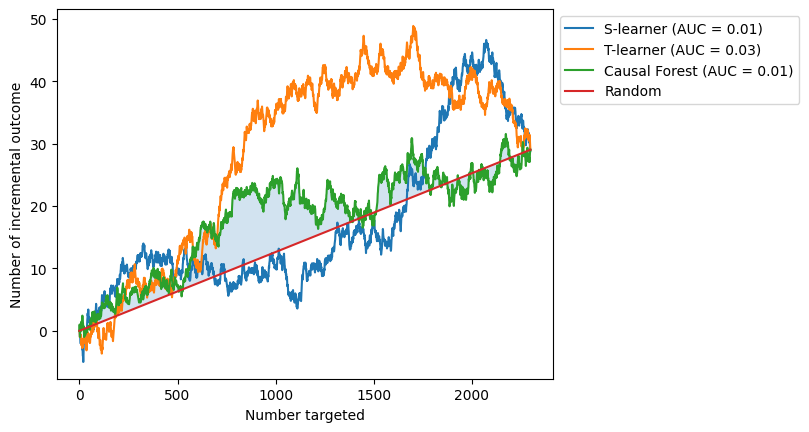

In [6]:
fig, ax = plt.subplots(1, 1)
plot_qini_curve(y_true=real_y, uplift=s_learner_ite, treatment=real_w, perfect=False, random=False, name="S-learner", ax=ax)

plot_qini_curve(y_true=real_y, uplift=t_learner_ite, treatment=real_w, perfect=False, random=False, name="T-learner", ax=ax)

plot_qini_curve(y_true=real_y, uplift=causal_forest_ite, treatment=real_w, perfect=False, name="Causal Forest", ax=ax)

In [7]:
print("Qini AUC score:")
print(f"S-learner: {qini_auc_score(y_true=real_y, uplift=s_learner_ite, treatment=real_w)}")
print(f"T-learner: {qini_auc_score(y_true=real_y, uplift=t_learner_ite, treatment=real_w)}")
print(f"Causal forest: {qini_auc_score(y_true=real_y, uplift=causal_forest_ite, treatment=real_w)}")

Qini AUC score:
S-learner: 0.005152485946702577
T-learner: 0.026167570651830077
Causal forest: 0.006816264770338604
